In [1]:
import string
import re
from os import listdir
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2023-12-20 07:57:05.668945: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 07:57:05.672790: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 07:57:05.728387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 07:57:05.728420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 07:57:05.729798: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
df1 = pd.read_csv('ecommerceDatasetNLP.csv', header=None, names=['class','text'])
df1

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [3]:


df = df1.groupby('class').head(1000).reset_index(drop = True)


In [4]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
3995,Electronics,Cooler Master Silent 120 SI2 (4 in 1) Cooling ...
3996,Electronics,"MAA-KU DC Axial Case Cooling Fan. SIZE : 3.65""..."
3997,Electronics,Cooler Master 120MM SickleFlow X Led Fan (Colo...
3998,Electronics,Antec Prizm 120 RGB Case Fan Radiator with Asu...


In [5]:
df['class'].value_counts()

class
Household                 1000
Books                     1000
Clothing & Accessories    1000
Electronics               1000
Name: count, dtype: int64

In [6]:
df['class'].value_counts()

class
Household                 1000
Books                     1000
Clothing & Accessories    1000
Electronics               1000
Name: count, dtype: int64

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='class'>

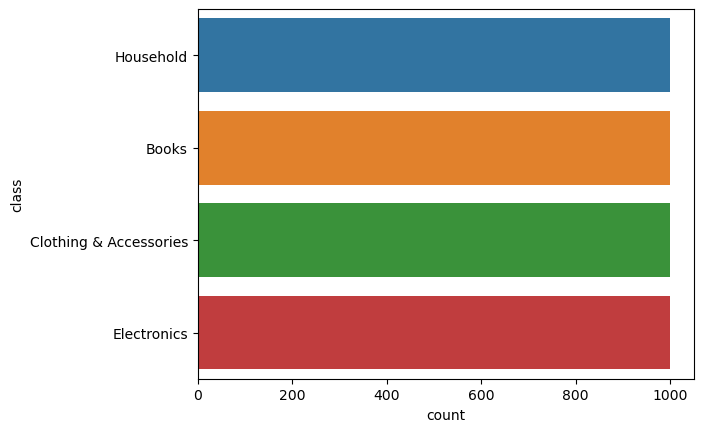

In [7]:
sns.countplot(y=df['class'])

In [8]:
df.isnull().sum()

class    0
text     0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

class    0
text     0
dtype: int64

In [10]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [11]:
# df['text'].apply(lambda x: clean_text(x))

In [12]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
3995,Electronics,Cooler Master Silent 120 SI2 (4 in 1) Cooling ...
3996,Electronics,"MAA-KU DC Axial Case Cooling Fan. SIZE : 3.65""..."
3997,Electronics,Cooler Master 120MM SickleFlow X Led Fan (Colo...
3998,Electronics,Antec Prizm 120 RGB Case Fan Radiator with Asu...


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,class,text
0,3,Paper Plane Design Framed Wall Hanging Motivat...
1,3,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,3,SAF 'UV Textured Modern Art Print Framed' Pain...
3,3,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,3,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
3995,2,Cooler Master Silent 120 SI2 (4 in 1) Cooling ...
3996,2,"MAA-KU DC Axial Case Cooling Fan. SIZE : 3.65""..."
3997,2,Cooler Master 120MM SickleFlow X Led Fan (Colo...
3998,2,Antec Prizm 120 RGB Case Fan Radiator with Asu...


In [14]:
y = df['class']
y

0       3
1       3
2       3
3       3
4       3
       ..
3995    2
3996    2
3997    2
3998    2
3999    2
Name: class, Length: 4000, dtype: int64

In [15]:
x = df['text']
x

0       Paper Plane Design Framed Wall Hanging Motivat...
1       SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2       SAF 'UV Textured Modern Art Print Framed' Pain...
3       SAF Flower Print Framed Painting (Synthetic, 1...
4       Incredible Gifts India Wooden Happy Birthday U...
                              ...                        
3995    Cooler Master Silent 120 SI2 (4 in 1) Cooling ...
3996    MAA-KU DC Axial Case Cooling Fan. SIZE : 3.65"...
3997    Cooler Master 120MM SickleFlow X Led Fan (Colo...
3998    Antec Prizm 120 RGB Case Fan Radiator with Asu...
3999    Cooler Master Sickleflowx Blue Led Cooler Colo...
Name: text, Length: 4000, dtype: object

In [16]:
# x_vect = tfidf.fit_transform(df['text'])

In [17]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, stratify= y, test_size=0.25)

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [18]:
x_train.shape, x_test.shape

((3000,), (1000,))

In [19]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove puctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove reamaning tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [20]:
df['text'] = df['text'].apply(lambda x: clean_doc(x))

In [21]:
df

,class,text
0,3,"[Paper, Plane, Design, Framed, Wall, Hanging, ..."
1,3,"[SAF, Floral, Framed, Painting, Wood, inch, in..."
2,3,"[SAF, UV, Textured, Modern, Art, Print, Framed..."
3,3,"[SAF, Flower, Print, Framed, Painting, Synthet..."
4,3,"[Incredible, Gifts, India, Wooden, Happy, Birt..."
...,...,...
3995,2,"[Cooler, Master, Silent, Cooling, Fan, Size, C..."
3996,2,"[MAAKU, DC, Axial, Case, Cooling, Fan, SIZE, i..."
3997,2,"[Cooler, Master, SickleFlow, Led, Fan, Colors,..."
3998,2,"[Antec, Prizm, RGB, Case, Fan, Radiator, Asus,..."


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# define the model
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(100, input_shape = (n_words,), activation = 'relu'))
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(1,  activation = 'sigmoid'))
  # compile network
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  # summerize defined model
  model.summary()
  plot_model(model, to_file='model.png',show_shapes=True)
  return model

In [24]:
# pip install pydot graphviz

In [25]:
define_model(100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15201 (59.38 KB)
Trainable params: 15201 (59.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [27]:
# create the tokenizer
tokenizer = create_tokenizer(x_train) 

In [28]:
# enocde data
x_train = tokenizer.texts_to_matrix(x_train, mode = 'binary')
x_train.shape

(3000, 21039)

In [29]:
x_test = tokenizer.texts_to_matrix(x_test, mode = 'binary')
x_test.shape

(1000, 21039)

In [30]:
# tokenizer.word_docs

In [31]:
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               2104000   
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2109101 (8.05 MB)
Trainable params: 2109101 (8.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, epochs = 100, batch_size=10)

Epoch 1/100


/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


300/300 [==============================] - 7s 16ms/step - loss: 0.0000e+00 - accuracy: 0.2870
Epoch 2/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0000e+00 - accuracy: 0.3213
Epoch 3/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0000e+00 - accuracy: 0.3307
Epoch 4/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0000e+00 - accuracy: 0.3320
Epoch 5/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0000e+00 - accuracy: 0.3350
Epoch 6/100
300/300 [==============================] - 5s 16ms/step - loss: 0.0000e+00 - accuracy: 0.3347
Epoch 7/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0000e+00 - accuracy: 0.3350
Epoch 8/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0000e+00 - accuracy: 0.3377
Epoch 9/100
300/300 [==============================] - 5s 15ms/step - loss: 0.0000e+00 - accuracy: 0.3367
Epoch 10/100
300/300 [==============================] - 5s

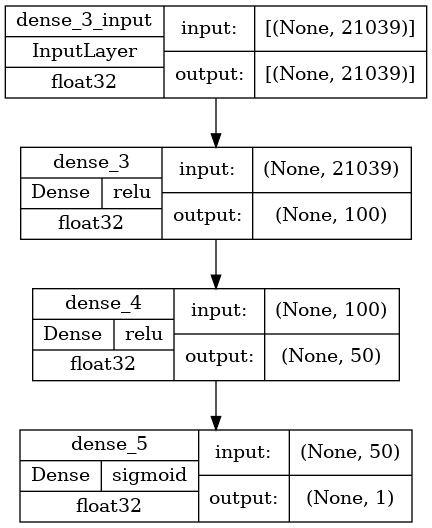

In [33]:
plot_model(model, show_dtype=True, show_layer_activations = True, show_shapes = True, show_layer_names=True)

In [34]:
model.evaluate(x_test,np.array(y_test), batch_size=1)

   1/1000 [..............................] - ETA: 4:28 - loss: 0.0000e+00 - accuracy: 0.0000e+00

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(1, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3310


[0.0, 0.3310000002384186]

In [35]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie.'
text3 = 'This is a best movie'
text4 = 'The acting was bad in this movie'

In [36]:
def predict(text):
  tokens = clean_doc(text)
  text = " ".join(tokens)
  x_test = tokenizer.texts_to_matrix([text], mode = 'binary')
  prediction = model.predict(x_test)
  if prediction >= 0.5:
    return 'Positive'
  else:
     return 'Negative'

In [37]:
predict(text1)

1/1 [==============================] - 0s 111ms/step


'Positive'

In [38]:
predict(text2)

1/1 [==============================] - 0s 33ms/step


'Positive'

In [39]:
predict(text3)

1/1 [==============================] - 0s 27ms/step


'Positive'

In [40]:
predict(text4)

1/1 [==============================] - 0s 29ms/step


'Positive'

In [41]:
# classify a review a negative or positive
def predict_sentiment(review):
  #clean
  tokens = clean_doc(review)
  # Convert to line
  line = ' '.join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode = 'binary')
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and lable
  percent_pos = yhat[0 ,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, "POSITIVE"

In [42]:
percent, sentiment = predict_sentiment(text1)
print('Review: [%s]\n Sentiment: %s (%.3f%%)' % (text1, sentiment, percent))

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: POSITIVE (1.000%)


In [43]:
percent, sentiment = predict_sentiment(text2)
print(f'Review: [{text1}]\n Sentiment: {sentiment} ({percent:.3f}%)')

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: POSITIVE (1.000%)


In [44]:
predict_sentiment(text3)

(1.0, 'POSITIVE')

In [45]:
predict_sentiment(text4)

(1.0, 'POSITIVE')